![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Sentiment Classification

### Dataset
- Dataset of 50,000 movie reviews from IMDB, labeled by sentiment positive (1) or negative (0)
- Reviews have been preprocessed, and each review is encoded as a sequence of word indexes (integers).
- For convenience, words are indexed by overall frequency in the dataset, so that for instance the integer "3" encodes the 3rd most frequent word in the data. This allows for quick filtering operations such as: "only consider the top 10,000 most common words, but eliminate the top 20 most common words".
- As a convention, "0" does not stand for a specific word, but instead is used to encode any unknown word.

Command to import data
- `from tensorflow.keras.datasets import imdb`

### Import the data (2 Marks)
- Use `imdb.load_data()` method
- Get train and test set
- Take 10000 most frequent words

In [ ]:
#### Loading the Moview review database ####
import tensorflow as tf
from tensorflow.keras.datasets import imdb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
desired_vocab_size = 10000
# eliminating the top 20 common words using these parameters
(X_train, y_train), (X_test, y_test) = imdb.load_data(path='imdb.npz',
                                                      num_words=desired_vocab_size, 
                                                      skip_top=20, seed=100, index_from=1) 
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)
print(X.shape)
print(y.shape)

(50000,)
(50000,)


In [ ]:
print("Categories: ", np.unique(y))
print("Number of Unique Words:",len(np.unique(np.hstack(X))))

Categories:  [0 1]
Number of Unique Words: 9981


In [ ]:
np.unique(np.hstack(X))

array([   2,   20,   21, ..., 9997, 9998, 9999])

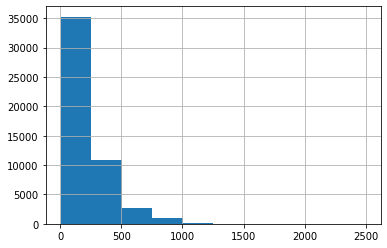

count    50000.000000
mean       234.758920
std        172.913224
min          7.000000
25%        129.000000
50%        176.000000
75%        285.000000
max       2494.000000
dtype: float64

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
reviews_len = [len(x) for x in X]
pd.Series(reviews_len).hist()
plt.show()
pd.Series(reviews_len).describe()

Review length: 
Mean 234.76 words (172.911495)


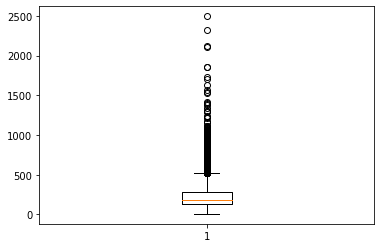

In [ ]:
# Summarize review length
print("Review length: ")
result = [len(x) for x in X]
print("Mean %.2f words (%f)" % (np.mean(result), np.std(result)))
# plot review length
plt.boxplot(result)
plt.show()

### Pad each sentence to be of same length (2 Marks)
- Take maximum sequence length as 300

In [ ]:
#### Add your code here ####
from keras.preprocessing import sequence
X_train = sequence.pad_sequences(X_train, maxlen=300)
X_test = sequence.pad_sequences(X_test, maxlen=300)

### Print shape of features & labels (2 Marks)

Number of review, number of words in each review

In [ ]:
#### Add your code here ####
X_train.shape

(25000, 300)

In [ ]:
#### Add your code here ####
X_test.shape

(25000, 300)

Number of labels

In [ ]:
#### Add your code here ####
y_train.shape

(25000,)

In [ ]:
#### Add your code here ####
y_test.shape

(25000,)

### Print value of any one feature and it's label (2 Marks)

Feature value

In [ ]:
#### Add your code here ####
print("Feature:", X[0])

Feature: [2, 130, 2, 130, 495, 252, 2, 28, 2, 50, 2, 2, 45, 92, 481, 31, 2, 206, 271, 2, 2, 2, 28, 1709, 2, 2, 45, 2, 747, 2, 55, 822, 1460, 78, 1142, 2, 48, 1836, 80, 47, 2, 2, 710, 2, 2, 429, 2, 2, 36, 252, 2, 28, 50, 2, 2, 77, 92, 747, 636, 2, 516, 2, 527, 213, 233, 2, 36, 2, 2, 62, 3925, 2, 2, 1216, 61, 24, 341, 32, 2, 429, 24, 4272, 130, 2, 130, 150, 385, 2, 527, 1195, 49, 27, 1289, 2, 206, 2, 2, 2, 92, 747, 2, 25, 417, 2313, 2, 2, 2, 2, 25, 215, 27, 125, 25, 116, 2, 166, 1945, 2068, 1679, 2, 30, 2, 83, 1436, 23, 68, 2621, 2, 2, 684, 29, 2750, 2825, 25, 2, 45, 2, 1462, 761, 2, 2, 2, 2, 5583, 2, 1976, 92, 2123, 947, 2, 128, 23, 60, 28, 712, 1636, 2, 2, 1172, 2, 130, 2, 130, 2, 22, 288, 147, 2, 48, 24, 193, 755, 2, 4476, 2, 2, 2, 439, 45, 47, 1982, 137, 2, 2, 121, 3245, 2, 1089, 2100, 2, 263, 23, 142, 22, 1659, 2, 2, 2, 4888, 38, 2, 4489, 130, 626, 2217, 2, 488, 28, 1198, 2, 1714, 4093, 2, 495, 2, 4001, 127, 481, 58, 46, 127, 1222, 1289, 2, 2, 2, 97, 576, 2, 2878, 89, 2, 2, 56]


Label value

In [ ]:
#### Add your code here ####
print("Label:", y[0])

Label: 0


### Decode the feature value to get original sentence (2 Marks)

First, retrieve a dictionary that contains mapping of words to their index in the IMDB dataset

In [ ]:
#### Add your code here ####
index = imdb.get_word_index()
reverse_index = dict([(value,key) for (key,value) in index.items()])

In [ ]:
reverse_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

Now use the dictionary to get the original words from the encodings, for a particular sentence

In [ ]:
#### Add your code here ####
decoded = " ".join([reverse_index.get(i-3,"#") for i in X[0]])
print(decoded)

# end # end works sure # have # there # # it's don't sound one # action goes # # # have station # # it's # ten # very figure pain bad spend # if met will has # # silly # # against # # they sure # have there # # been don't ten opening # kill # horrible point anything # they # # would bite # # thanks my not death all # against not pig end # end now came # horrible sick some his edge # action # # # don't ten # you finally rose # # # # you must his off you acting # makes whenever decade member # be # into intended on their listening # # apparently he deeper throwing you # it's # everybody lady # # # # uh # blonde don't bear mess # better on even have problems news # # prison # end # end # film dvd real # if not take sequel # del # # # problem it's has bank while # # where pg # intelligent jennifer # our on something film ed # # # homer so # humble end released president # michael have somewhere # humans kirk # works # dracula does sound time out does computer edge # # # make extremely # no

Get the sentiment for the above sentence
- positive (1)
- negative (0)

In [ ]:
#### Add your code here ####
sentiment = {0:"negative", 1: "positive"}
print(sentiment.get(y[0]))

negative


### Define model (10 Marks)
- Define a Sequential Model
- Add Embedding layer
  - Embedding layer turns positive integers into dense vectors of fixed size
  - `tensorflow.keras` embedding layer doesn't require us to onehot encode our words, instead we have to give each word a unique integer number as an id. For the imdb dataset we've loaded this has already been done, but if this wasn't the case we could use sklearn LabelEncoder.
  - Size of the vocabulary will be 10000
  - Give dimension of the dense embedding as 100
  - Length of input sequences should be 300
- Add LSTM layer
  - Pass value in `return_sequences` as True
- Add a `TimeDistributed` layer with 100 Dense neurons
- Add Flatten layer
- Add Dense layer

In [ ]:
#### Add your code here ####
#Initialize model
tf.keras.backend.clear_session()
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(desired_vocab_size + 1, #Vocabulary size
                                    100, #Embedding size
                                    input_length=300) #Number of words in each review
          )
model.add(tf.keras.layers.LSTM(128, return_sequences=True)) #RNN State - size of cell state and hidden state
model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(100, activation='relu')))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
# Output- Layer
model.add(tf.keras.layers.Dense(1, activation = "sigmoid"))

### Compile the model (2 Marks)
- Use Optimizer as Adam
- Use Binary Crossentropy as loss
- Use Accuracy as metrics

In [ ]:
#### Add your code here ####
# compiling the model
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

### Print model summary (2 Marks)

In [ ]:
#### Add your code here ####
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 100)          1000100   
_________________________________________________________________
lstm (LSTM)                  (None, 300, 128)          117248    
_________________________________________________________________
time_distributed (TimeDistri (None, 300, 100)          12900     
_________________________________________________________________
flatten (Flatten)            (None, 30000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                1920064   
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6

### Fit the model (2 Marks)

In [ ]:
X_train.shape

(25000, 300)

In [ ]:
y_train.shape

(25000,)

In [ ]:
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('LSTM.h5', monitor='accuracy', save_best_only=True, verbose=1)

In [ ]:
#### Add your code here ####
history = model.fit(X_train, y_train, batch_size=256, epochs=10, validation_data=(X_test, y_test),  callbacks =[model_checkpoint])

Epoch 1/10
98/98 [==============================] - 261s 3s/step - loss: 0.5938 - accuracy: 0.6278 - val_loss: 0.2959 - val_accuracy: 0.8752

Epoch 00001: accuracy improved from -inf to 0.75520, saving model to LSTM.h5
Epoch 2/10
98/98 [==============================] - 259s 3s/step - loss: 0.2194 - accuracy: 0.9179 - val_loss: 0.3023 - val_accuracy: 0.8722

Epoch 00002: accuracy improved from 0.75520 to 0.91612, saving model to LSTM.h5
Epoch 3/10
98/98 [==============================] - 291s 3s/step - loss: 0.1558 - accuracy: 0.9448 - val_loss: 0.3427 - val_accuracy: 0.8725

Epoch 00003: accuracy improved from 0.91612 to 0.93996, saving model to LSTM.h5
Epoch 4/10
98/98 [==============================] - 256s 3s/step - loss: 0.1096 - accuracy: 0.9621 - val_loss: 0.3780 - val_accuracy: 0.8682

Epoch 00004: accuracy improved from 0.93996 to 0.95764, saving model to LSTM.h5
Epoch 5/10
98/98 [==============================] - 257s 3s/step - loss: 0.0757 - accuracy: 0.9758 - val_loss: 0.40

In [ ]:
print("Test-Accuracy:", np.mean(history.history["val_accuracy"]))

Test-Accuracy: 0.8621760010719299


### Evaluate model (2 Marks)

In [ ]:
#### Add your code here ####
model.evaluate(X_test, y_test)

782/782 [==============================] - 77s 98ms/step - loss: 1.0602 - accuracy: 0.8536


[1.0602221488952637, 0.8535599708557129]

### Predict on one sample (2 Marks)

In [ ]:
y_pred = model.predict_classes(X_test, batch_size = 256)

true = 0
for i, y in enumerate(y_test):
    if y == y_pred[i]:
        true += 1

print('Correct Prediction: {}'.format(true))
print('Wrong Prediction: {}'.format(len(y_pred) - true))
print('Accuracy: {}'.format(true/len(y_pred)*100))

Correct Prediction: 21339
Wrong Prediction: 3661
Accuracy: 85.356


In [ ]:
#### Add your code here ####
print(y_pred)

[[0]
 [1]
 [1]
 ...
 [0]
 [1]
 [0]]


In [ ]:
y_pred[10][0]

1

In [ ]:
#### Add your code here ####
decoded = " ".join([reverse_index.get(i-3,"#") for i in X_test[10]])
print(decoded)

but # its # street # leader words # # # you din # # # absurdity 19 # # # # will # # # # # # # manhattan trap listed # die predator russ existent be want awesome watching # # # claiming then # # use # # # # # win # night things # doesn't # # # it's has let sad charles so # # h should look # why through if paintings # # action production # claiming will need character angeles # # # # # # randolph # fade # 80 # # 10 starts # effects warned # # # # # # my # he # she genre recommend all # its # # # # enjoy # # claiming person why # enjoy # # its all # absurdity blockbuster truth bore # # # # professional an directors when # way # # standing any starts context us # # time has # question claiming then stock arnold # brings fact ellen # sam production but # wow but # its # peoples # create do considering knew # better # will # more charms age part apparently misguided party # # #  these production # #  # h # # # # i'm father claiming perfectly they sure but really # screen made # be believe 

In [ ]:
print(sentiment.get(y_test[10]))
print(sentiment.get(y_pred[10][0]))

positive
positive
